# Object Detection and Geolocation  

This notebook demonstrates the object detection with GPS coordinates assignment. It uses a TensorFlow Hub model to detect objects in an image and assigns GPS coordinates based on the image's metadata.

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Found 100 objects.
Image saved at output/annotated_image.jpg


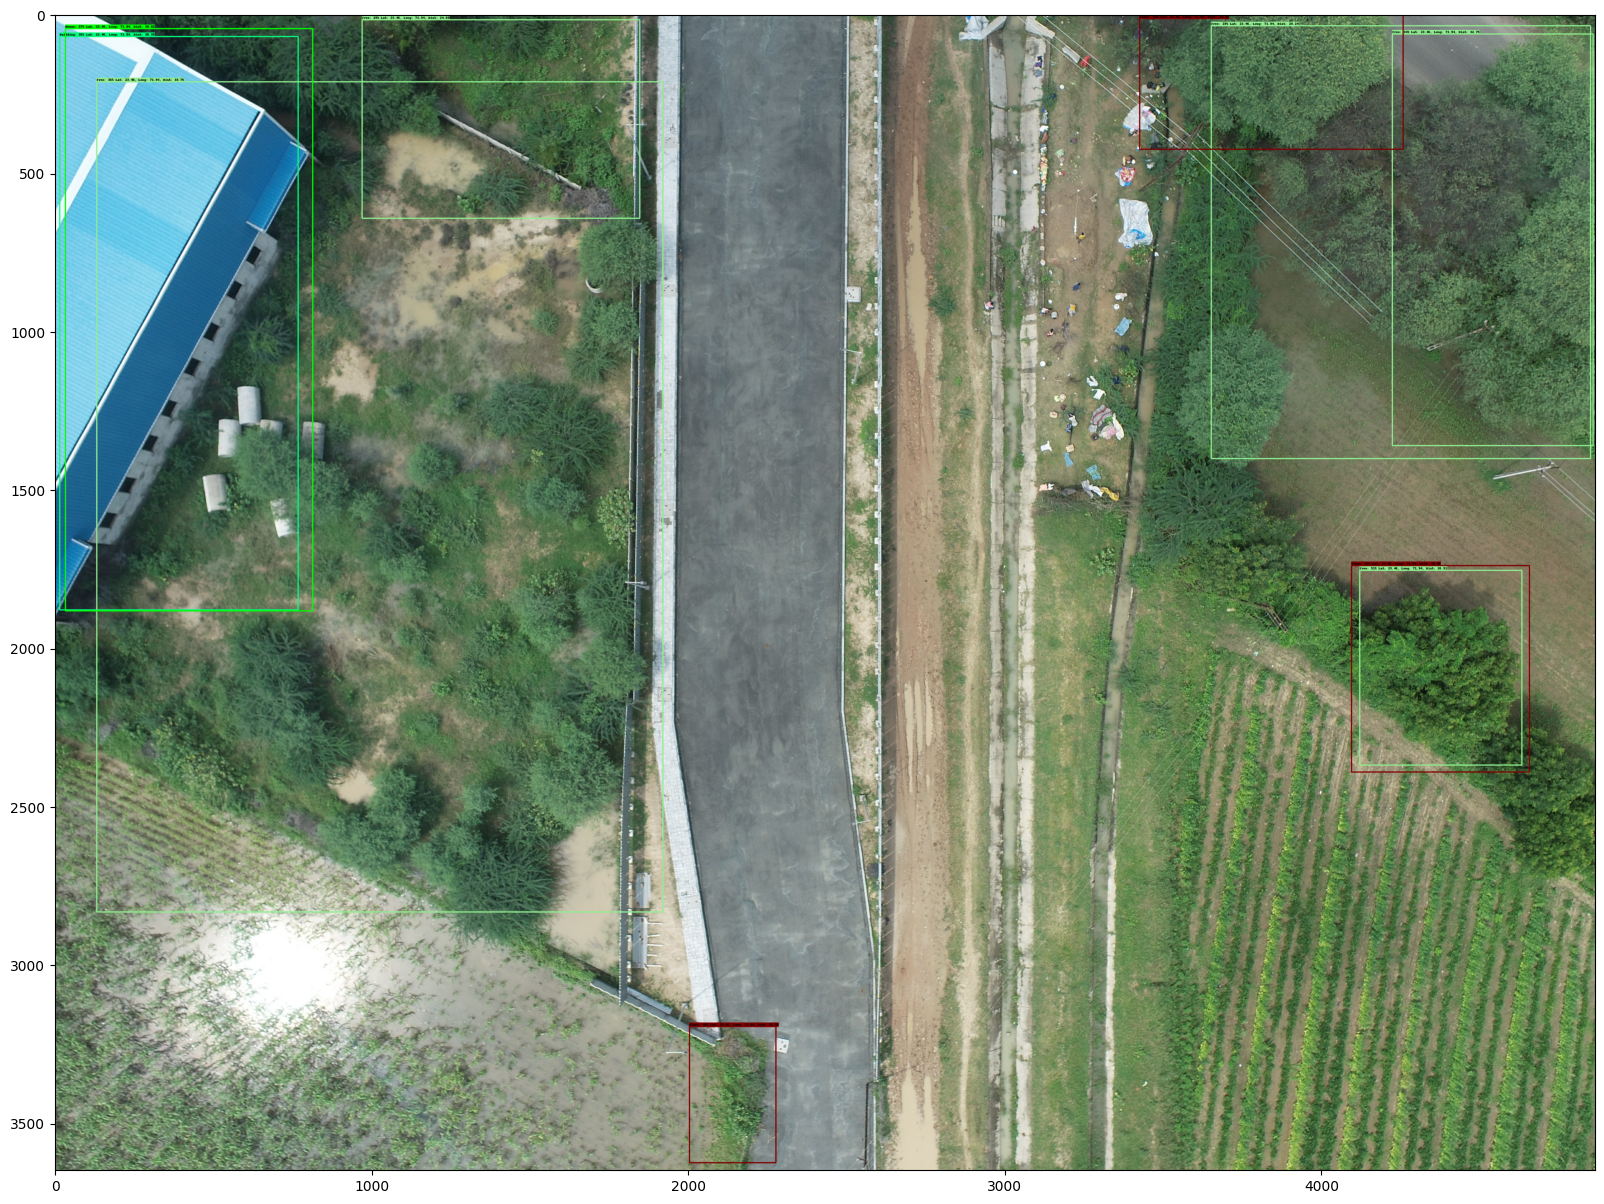

In [1]:
import sys
import tensorflow_hub as hub
import tensorflow as tf
from src.utils import load_img, draw_boxes, display_image, save_to_excel, save_img
import pandas as pd

def run_detector(detector, path):
    """
    Runs the object detector on the input image, draws bounding boxes around detected objects,
    and saves the annotated image and detection details.

    Parameters:
    detector (tf.Module): The TensorFlow Hub object detection module.
    path (str): The path to the input image.
    """
    img = load_img(path)
    converted_img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
    result = detector(converted_img)
    result = {key: value.numpy() for key, value in result.items()}
    print("Found %d objects." % len(result["detection_scores"]))

    image_with_boxes, detected_objects = draw_boxes(
        img.numpy(), result["detection_boxes"], result["detection_class_entities"], result["detection_scores"], path)

    display_image(image_with_boxes)
    save_img(image_with_boxes, "output/annotated_image.jpg")
    # save_to_excel(detected_objects)

# Load the object detection module from TensorFlow Hub
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
detector = hub.load(module_handle).signatures['default']

# Path to the input image
input_image_path = "data/input_image.jpg"  # Replace with your image path

# Run the detector
run_detector(detector, input_image_path)

## Detected objects  

The detected objects and their coordinates are saved in the `detected_objects.xlsx` file.

In [2]:
df = pd.read_excel('output/detected_objects.xlsx')
df

class_name     score   latitude  longitude   distance
0       Tree  0.510894  23.459376  71.942942  26.906989
1      Plant  0.405161  23.459100  71.943125  22.150510
2   Building  0.364133  23.458883  71.942798  30.353950
3       Tree  0.360493  23.458962  71.942871  19.748822
4       Tree  0.349559  23.459395  71.942761  32.750972
5       Tree  0.297453  23.459359  71.942762  29.236293
6       Tree  0.296969  23.459009  71.942711  24.887106
7      House  0.270739  23.458887  71.942797  30.016253
8      Plant  0.248881  23.459309  71.942694  29.414379
9      Plant  0.201287  23.459375  71.942943  26.902468